In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.plotting import *
from matplotlib import cm
from matplotlib.ticker import LinearLocator

evalfunc = lambda f,x,y: np.frompyfunc(lambda x,y: f.evalf(x,y))

In [ ]:
a = 5.291e-11
m = 10 

X = np.linspace(-m*a, m*a, 1000)
X, Y = np.meshgrid(X, X)

Z, a0, r, theta, phi = symbols("Z a0 r theta phi")
x, y, z = symbols("x y z")

phi1 = 1/sqrt(pi) * (Z/a0)**(3/2) * exp(-Z*r/a0)
phi2 = -1/(8*sqrt(pi)) * (Z/a0)**(3/2) * (Z*r)/a0 * exp(-Z*r/(2*a0))* sin(theta) * exp(1j * phi)
phi3 = sqrt(2)/(81*sqrt(pi)) * (Z/a0)**(3/2) * (6-Z*r/a0) * (Z*r)/a0 * exp(-Z*r/(3*a0))* cos(theta) 

cartesian = lambda f: f.subs({r: sqrt(x**2 + y**2 + z**2),
                              theta: acos(z / sqrt(x**2 + y**2 + z**2)),
                              phi: atan2(y,x),
                              Z:1,
                              a0:a}) 

cart_phi = [(abs(cartesian(phi)))**2 for phi in [phi1,phi2,phi3]]

for phi, name in zip(cart_phi, ("phi_1,0,0", 
                                "phi_2,1,+1", 
                                "phi_3,1,0")):
    try: 
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        # plot3d(phi.subs(x, 0), (z,-m*a,m*a),(y,-m*a,m*a), size=(8,8), title=name+", z-y")
        # plot3d(phi.subs(y, 0), (x,-m*a,m*a),(z,-m*a,m*a), size=(8,8), title=name+", x-z")
        # plot3d(phi.subs(z, 0), (x,-m*a,m*a),(y,-m*a,m*a), size=(8,8), title=name+", x-y")
        
        surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    except:
        pass


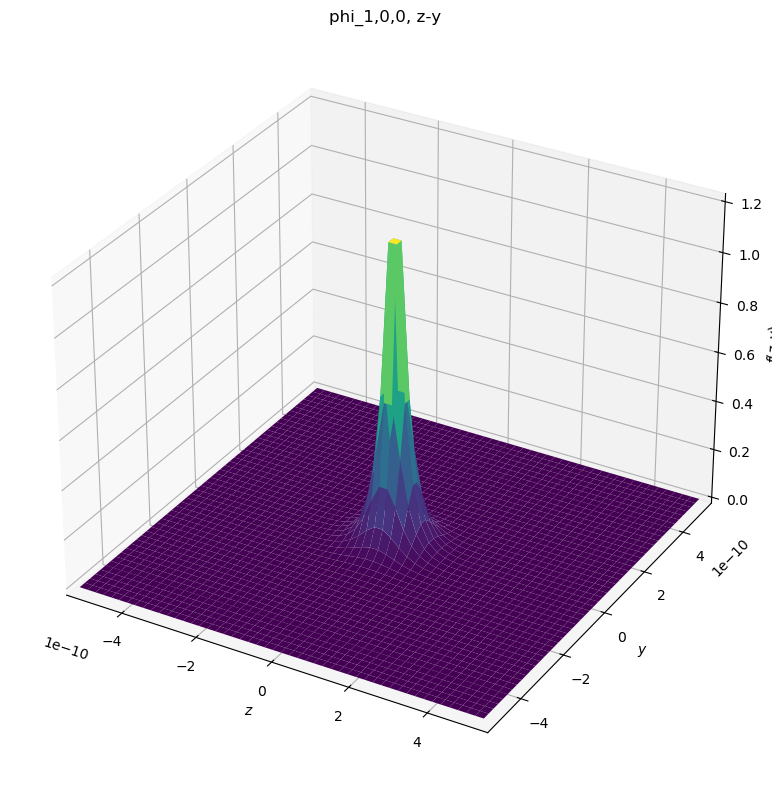

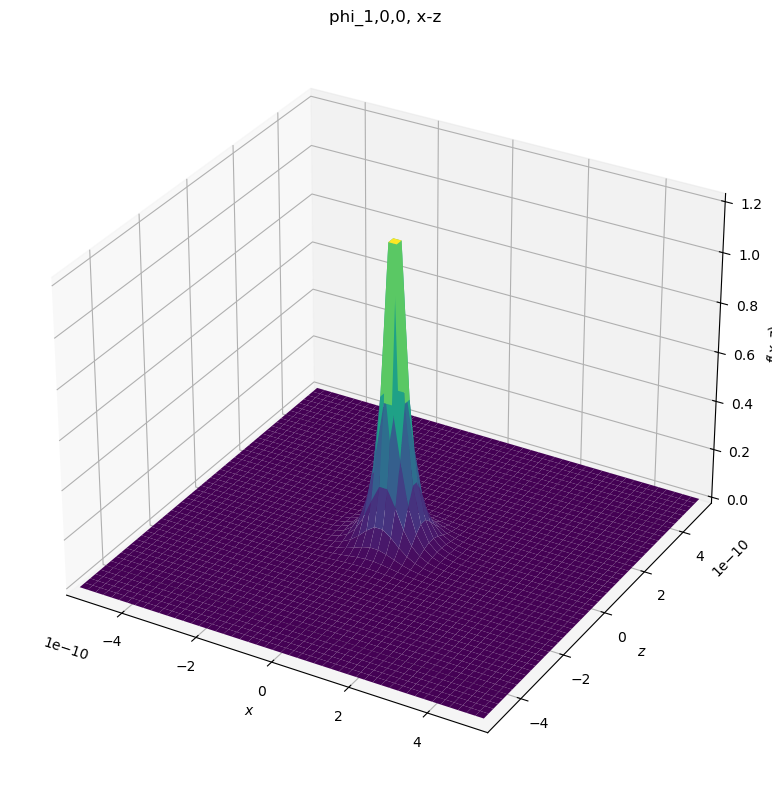

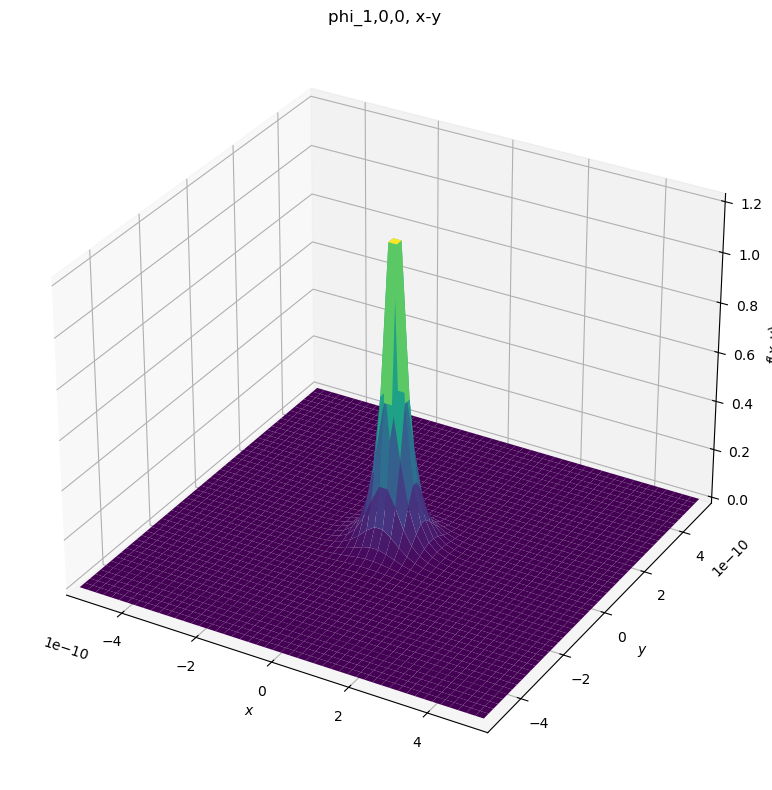

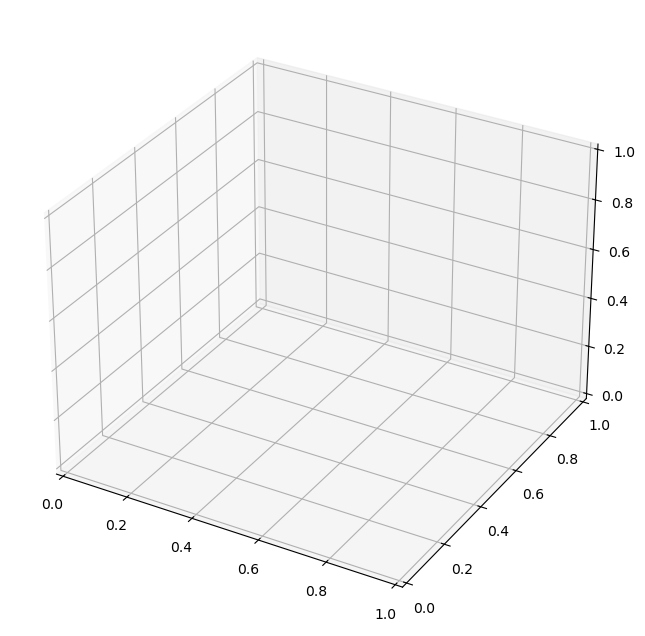

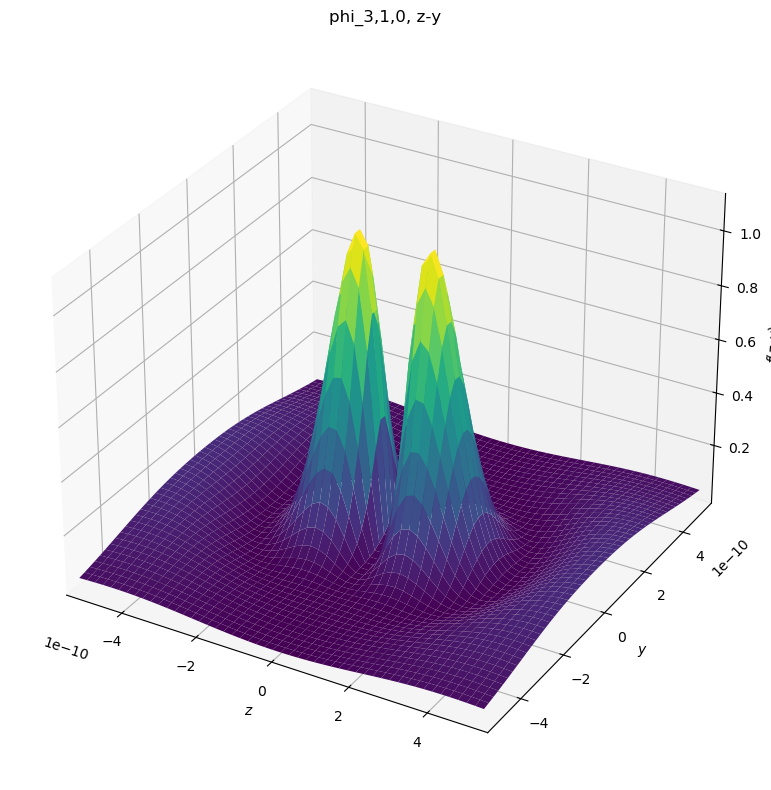

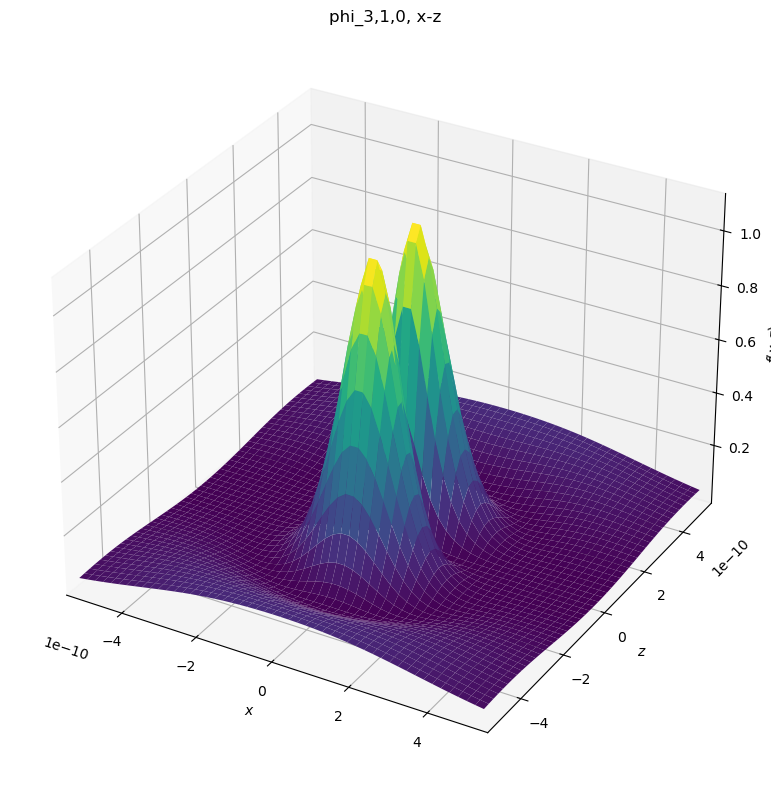

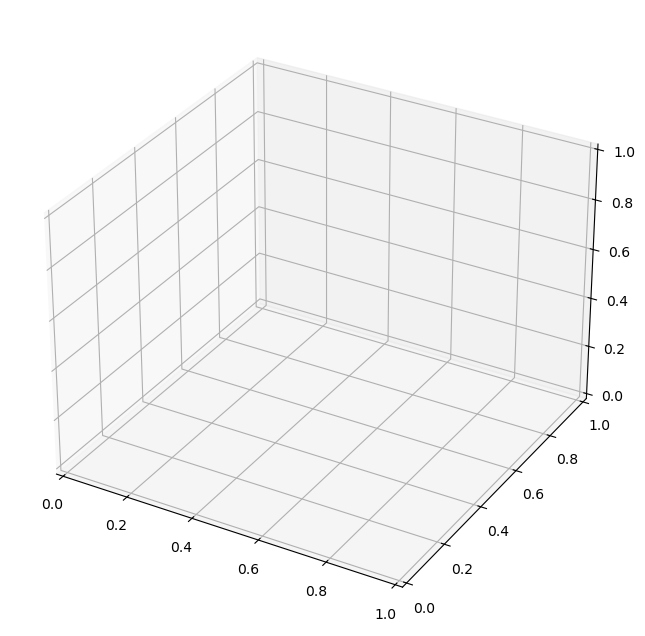

In [41]:
from sympy import *
from sympy.plotting import *

a = 5.291e-11

Z, a0, r, theta, phi = symbols("Z a0 r theta phi")
x, y, z = symbols("x y z")

phi1 = 1/sqrt(pi) * (Z/a0)**(3/2) * exp(-Z*r/a0)
phi2 = -1/(8*sqrt(pi)) * (Z/a0)**(3/2) * (Z*r)/a0 * exp(-Z*r/(2*a0))* sin(theta) * exp(1j * phi)
phi3 = sqrt(2)/(81*sqrt(pi)) * (Z/a0)**(3/2) * (6-Z*r/a0) * (Z*r)/a0 * exp(-Z*r/(3*a0))* cos(theta) 

cartesian = lambda f: f.subs({r: sqrt(x**2 + y**2 + z**2),
                              theta: acos(z / sqrt(x**2 + y**2 + z**2)),
                              phi: atan2(y,x),
                              Z:1,
                              a0:a}) 

cart_phi = [(abs(cartesian(phi)))**2 for phi in [phi1,phi2,phi3]]

for phi, name in zip(cart_phi, ("phi_1,0,0", 
                                "phi_2,1,+1", 
                                "phi_3,1,0")):
    try: 
        m = 10
        plot3d(phi.subs(x, 0), (z,-m*a,m*a),(y,-m*a,m*a), size=(8,8), title=name+", z-y")
        plot3d(phi.subs(y, 0), (x,-m*a,m*a),(z,-m*a,m*a), size=(8,8), title=name+", x-z")
        plot3d(phi.subs(z, 0), (x,-m*a,m*a),(y,-m*a,m*a), size=(8,8), title=name+", x-y")
    except:
        pass

# plot3d(cartesian(phi2).subs(x, 0), (z,-2*a,2*a),(y,-2*a,2*a), size=(8,8), title="phi1, z-y")
# plot3d(cartesian(phi2).subs(y, 0), (x,-2*a,2*a),(z,-2*a,2*a), size=(8,8), title="phi1, x-z")
# plot3d(cartesian(phi2).subs(z, 0), (x,-2*a,2*a),(y,-2*a,2*a), size=(8,8), title="phi1, x-y")
